In [4]:
from pandas import read_csv
dataset = read_csv('/content/customer_churn_dataset-testing-master.csv.zip')
display(dataset)
display(dataset.info())

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


None

In [5]:
#Exploratory Data Analysis

#data cleaning
dataset = dataset.drop(columns='CustomerID')
dataset = dataset.dropna()

display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                64374 non-null  int64 
 1   Gender             64374 non-null  object
 2   Tenure             64374 non-null  int64 
 3   Usage Frequency    64374 non-null  int64 
 4   Support Calls      64374 non-null  int64 
 5   Payment Delay      64374 non-null  int64 
 6   Subscription Type  64374 non-null  object
 7   Contract Length    64374 non-null  object
 8   Total Spend        64374 non-null  int64 
 9   Last Interaction   64374 non-null  int64 
 10  Churn              64374 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 5.4+ MB


None

In [6]:
dataset.shape

(64374, 11)

In [7]:
dataset.isna().sum()

,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0
Last Interaction,0


In [8]:
dataset.dtypes

,0
Age,int64
Gender,object
Tenure,int64
Usage Frequency,int64
Support Calls,int64
Payment Delay,int64
Subscription Type,object
Contract Length,object
Total Spend,int64
Last Interaction,int64


In [10]:
df_describe = dataset.describe()
df_describe

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [11]:
print(dataset['Churn'].dtype)
print(dataset['Churn'].unique())

int64
[1 0]


In [12]:
dataset['Churn'] = dataset['Churn'].map({1: 'Yes', 0: 'No'})
dataset.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,Yes
1,41,Female,28,28,7,13,Standard,Monthly,584,20,No
2,47,Male,27,10,2,29,Premium,Annual,757,21,No
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,No
4,53,Female,58,24,9,2,Standard,Annual,533,18,No


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Visualization
1. Churn and Gender Distribution

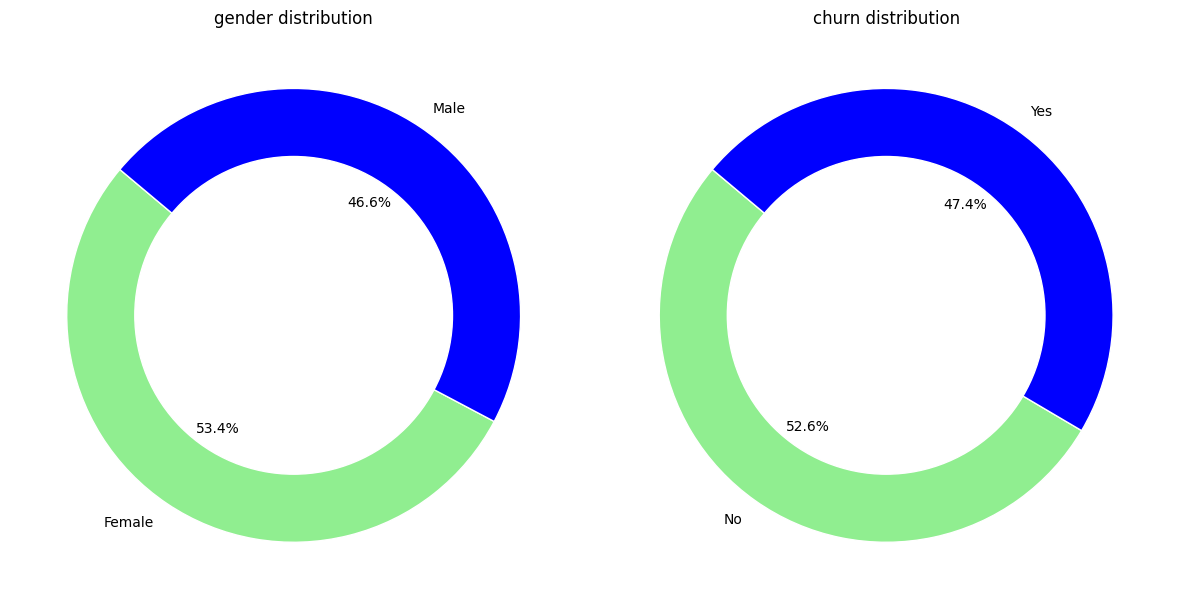

In [14]:
from numpy import c_
#Data visualization

gender_count = dataset['Gender'].value_counts()
churn_count = dataset['Churn'].value_counts()


# gender and churn labels
g_labels = gender_count.index
c_labels = churn_count.index

#create subplots

fig, axes = plt.subplots(1,2, figsize=(12,6))

# gender chart
axes[0].pie(gender_count, labels = g_labels, autopct= '%1.1f%%', startangle= 140,
            colors=['lightgreen','blue'], wedgeprops = {'edgecolor':'white'})
axes[0].add_artist(plt.Circle((0,0), 0.7, color='white'))
axes[0].set_title('gender distribution')

# churn chart
axes[1].pie(churn_count, labels = c_labels, autopct= '%1.1f%%', startangle= 140,
            colors=['lightgreen','blue'], wedgeprops = {'edgecolor':'white'})
axes[1].add_artist(plt.Circle((0,0), 0.7, color='white'))
axes[1].set_title('churn distribution')

#plot
plt.tight_layout()
plt.show()

## 2. Churn wrt **Gender**

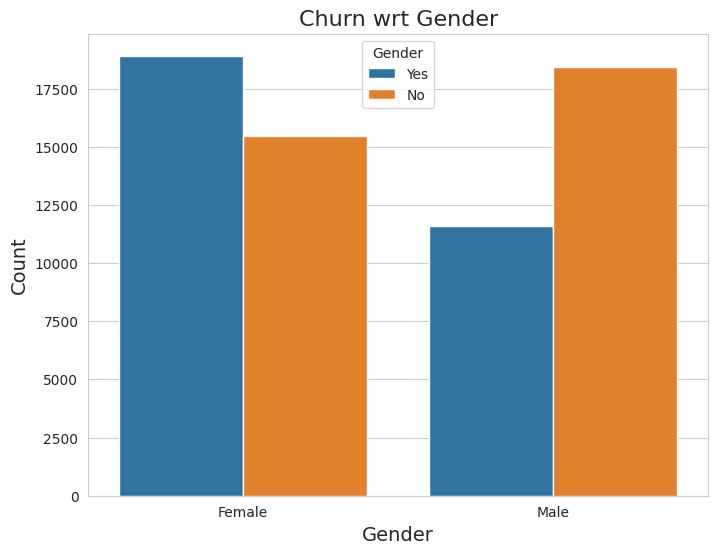

In [15]:
#figure
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
#count plot
sns.countplot(x='Gender', hue='Churn', data=dataset , palette='tab10')

#plot
plt.title('Churn wrt Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Gender')
plt.show()

# 3. churn wrt Subscription Type

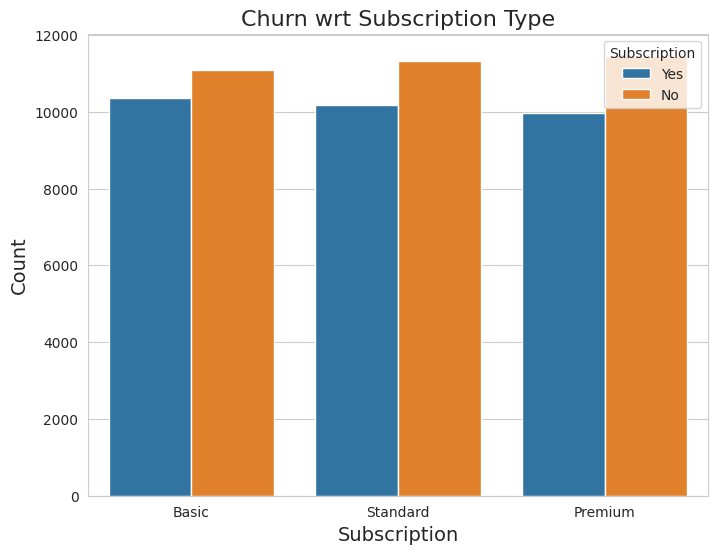

In [18]:
#figure
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
#count plot
sns.countplot(x='Subscription Type', hue='Churn', data=dataset , palette='tab10')

#plot
plt.title('Churn wrt Subscription Type', fontsize=16)
plt.xlabel('Subscription', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Subscription')
plt.show()

# 4. churn wrt Contract Length

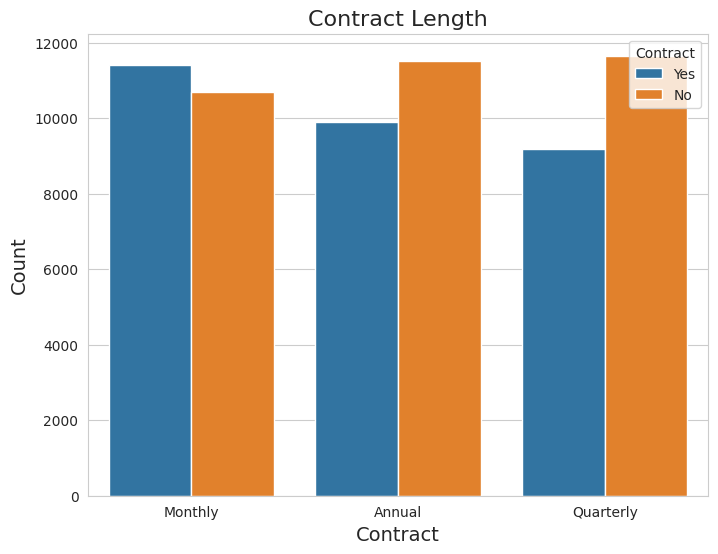

In [23]:
#figure
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
#count plot
sns.countplot(x='Contract Length', hue='Churn', data=dataset , palette='tab10')

#plot
plt.title('Contract Length', fontsize=16)
plt.xlabel('Contract', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Contract')
plt.show()

Now, it is important to identify the root causes of churn.
For this purpose, charts and graphs are crucial to providing a clear overview.**bold text**

In [45]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "colab"

for column in dataset.select_dtypes(include=['int64', 'float64']).columns:
    fig = px.histogram(
        dataset,
        y=column,
        color='Churn',     # must exist in dataset
        nbins=20,
        text_auto=True)
    fig.update_layout(
        title=f"Distribution of {column} by Churn",
        xaxis_title=column,
        yaxis_title="Count",
        bargap=0.1
    )
    fig.show()

Gender Impact: More than 50% of female customers have canceled the service,
indicating a potential dissatisfaction trend within this segment.

Payment Delay Risk: Customers with payment delays exceeding 20 days show a significantly higher probability of churn, highlighting the importance of proactive payment follow-ups.

Contract Type Risk: Customers subscribed to the monthly plan exhibit a 100% churn rate, suggesting short-term contracts are highly vulnerable and may require retention strategies or incentives.

Customer Support Calls: Customers who contacted support more than four times are highly likely to churn, indicating unresolved issues or service dissatisfaction.




# **Conducted scenario-based retention simulations to estimate potential revenue uplift and quantify the financial impact of churn reduction strategies.**

In [52]:
# Solving overdue
dataset = dataset[dataset['Last Interaction'] <= 20]
# Solving calls
dataset = dataset[dataset['Support Calls'] <= 4]
# Solving montlhy plan
dataset = dataset[dataset['Contract Length'] != 'Monthly']

# Cancel chart
chart = px.pie(dataset, names='Churn', color='Churn', title='Final churn proportion')
chart.show()
# Cancel per sex chart
chart = px.histogram(dataset, y='Gender', color='Churn', title='Churn per Gender')
chart.show()
# Customers per sex
chart = px.pie(dataset, names='Gender', color='Gender', title='Customers gender')
chart.show()

In [54]:
from sklearn.preprocessing import LabelEncoder

#category columns in the dataset
cat_cols = dataset.select_dtypes(include=['object']).columns.tolist()

#Lable encoding columns
le= LabelEncoder()
for col in cat_cols:
    dataset[col] = le.fit_transform(dataset[col])
#dataset
dataset.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
9,65,1,8,4,2,23,0,0,995,10,0
14,59,1,21,17,2,14,1,1,663,15,0
17,45,1,9,30,4,25,0,0,127,18,0
22,55,1,50,28,0,17,2,1,449,3,0
25,65,0,58,7,3,30,1,0,166,1,1


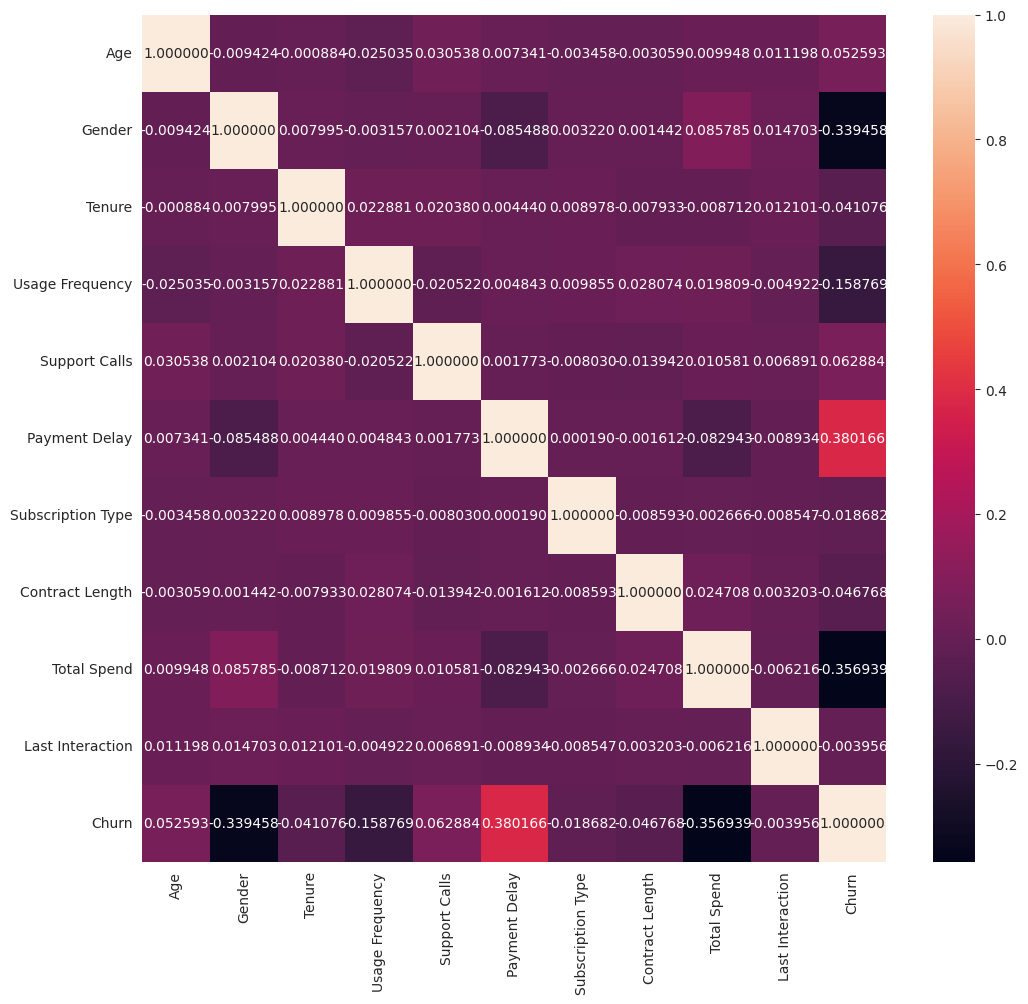

<Figure size 640x480 with 0 Axes>

In [55]:
#correlation matraix'

plt.figure(figsize=(12,11))
sns.heatmap(dataset.corr(), annot=True , fmt='2f')
plt.figure('feature correlation headmap')
plt.show()
#

In [56]:
# correlatio of target variable with other independent variables
dataset.corr()['Churn'].sort_values(ascending = False)

,Churn
Churn,1.000000
Payment Delay,0.380166
Support Calls,0.062884
Age,0.052593
Last Interaction,-0.003956
Subscription Type,-0.018682
Tenure,-0.041076
Contract Length,-0.046768
Usage Frequency,-0.158769
Gender,-0.339458
